In [3]:
import numpy as np

In [4]:
# Stirling numbers of second kind
S = [[0 for i in range(10001)] for j in range(10001)]

# Combinations
C = [[0 for i in range(10001)] for j in range(10001)]

In [5]:
from scipy.special import factorial
from decimal import Decimal
import decimal
import math

def stirling(n,k,S):
    if S[n][k] > 0: return S[n][k]
    if k>n or k==0 or n==0: return 0
    if k==1 or k==n:
        S[n][k]=1
    else:
        S[n][k] = Decimal(stirling(n-1,k-1,S) + k*stirling(n-1,k,S))
    return S[n][k]

def combs(n,k,C,S):
    if C[n][k] > 0: return C[n][k]
    if k>n or k==0 or n==0: return 0
    c = Decimal(math.factorial(n)) / Decimal(math.factorial(n-k))
    C[n][k] = Decimal(c*stirling(n,k,S))
    return C[n][k]

def H(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal(C[n][k] * Decimal((z**k)))
    return h

# Denominator in Expected no. of colors
def H_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal(k * C[n][k] * Decimal((z**k)))
    return h

# Denominator in Expected no. of colors squared
def H_t_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal((k**2) * C[n][k] * Decimal((z**k)))
    return h

def E_cols(n,z,C):
    return Decimal(H_t(n,z,C)/H(n,z,C))

def Var_cols(n,z,C):
    EX_2 = Decimal(H_t_t(n,z,C)/H(n,z,C))
    v = Decimal(EX_2 - (E_cols(n,z,C)**2))
    if v < 0:
        # print("Negative variance in",n,z,C)
        v = 0
    return v

def std_cols(n,z,C):
    return float(Var_cols(n,z,C))**(0.5)

In [5]:
for i in range(2501):
    if i%100==0: print(i)
    for j in range(2501):
        stirling(i,j,S)
        combs(i,j,C,S)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [ ]:
import pickle

# with open(r"Stirling_2500_.pickle", "wb") as f:
#     pickle.dump(S, f)
# with open(r"Combs_2500_.pickle", "wb") as f:
#     pickle.dump(C, f)

with open(r"Stirling_2500.pickle", "rb") as f:
    S = pickle.load(f)
with open(r"Combs_2500.pickle", "rb") as f:
    C = pickle.load(f)

In [6]:
print("C(4,2):", C[4][2]) #84
print("C(4,.):", C[4][:10])
print ("sum of C(4,.):", sum(C[4]))
print ("H(4,1):", H(4,1,C))
print ("H_t(4,1):", H_t(4,1,C))
print ("H_t_t(4,1):", H_t_t(4,1,C))
print ("E_cols(4,1):", E_cols(4,1,C))
print ("Var_cols(4,1):", Var_cols(4,1,C))
print ("std_cols(4,1):", std_cols(4,1,C))

C(4,2): 84
C(4,.): [0, Decimal('4'), Decimal('84'), Decimal('144'), Decimal('24'), 0, 0, 0, 0, 0]
sum of C(4,.): 256
H(4,1): 256
H_t(4,1): 700
H_t_t(4,1): 2020
E_cols(4,1): 2.734375
Var_cols(4,1): 0.413818359375
std_cols(4,1): 0.6432871515699656


In [ ]:
print("C(4,2):", myC[4][2]) #84
print("C(4,.):", myC[4][:10])
print ("sum of C(4,.):", sum(myC[4]))
print ("H(4,1):", H(4,1,myC))
print ("H_t(4,1):", H_t(4,1,myC))
print ("H_t_t(4,1):", H_t_t(4,1,myC))
print ("E_cols(4,1):", E_cols(4,1,myC))
print ("Var_cols(4,1):", Var_cols(4,1,myC))
print ("std_cols(4,1):", std_cols(4,1,myC))

In [7]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_expected_colors (N):
    max_gamma = 100
    z = [np.e**(-gamma) for gamma in range(max_gamma)]
    print(z)
    y = [E_cols(N,zz,C) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.plot(range(max_gamma), y, '-ok')
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Expected num. colors")
    plt.title(str(N) + " total sites / colors")
    plt.savefig("Expected_no_colors/(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_std_colors (N):
    max_gamma = int(N*1.2)
    gammas = range(max_gamma)
    z = [Decimal(np.e)**(-gamma) for gamma in gammas]
    y = [std_cols(N,zz,C) for zz in z]
    peaks, _ = find_peaks(y, height=0.1)
    print(N, peaks)
    pk_gammas = np.array([gammas[pk] for pk in peaks])
    print(pk_gammas/pk_gammas[-1])
    print()
    f = plt.figure(figsize=(18, 5))
    plt.plot(gammas, y)
    plt.plot(peaks, [y[pk] for pk in peaks], "|", c="red", ms=20)
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Std. num. colors")
    plt.title(str(N) + " total sites / colors")
    plt.savefig("Expected_no_colors/std_aprox_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_avg_std_colors (N):
    max_gamma = 100
    gammas = np.linspace(0, max_gamma, num=100)
    z = [np.e**(-gamma) for gamma in gammas]
    y = [E_cols(N,zz,C) for zz in z]
    yerr = [np.real(std_cols(N,zz,C)) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.errorbar(gammas, y, yerr=yerr, marker='o', color='black', capsize=3)
    plt.xlabel("Gamma (g)", fontsize=20) 
    plt.ylabel("Expected num. colors", fontsize=20)
    plt.title(str(N) + " total sites / colors", fontsize=20)
    plt.savefig("Expected_no_colors/avg_std_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()

16 [13]
[1.]



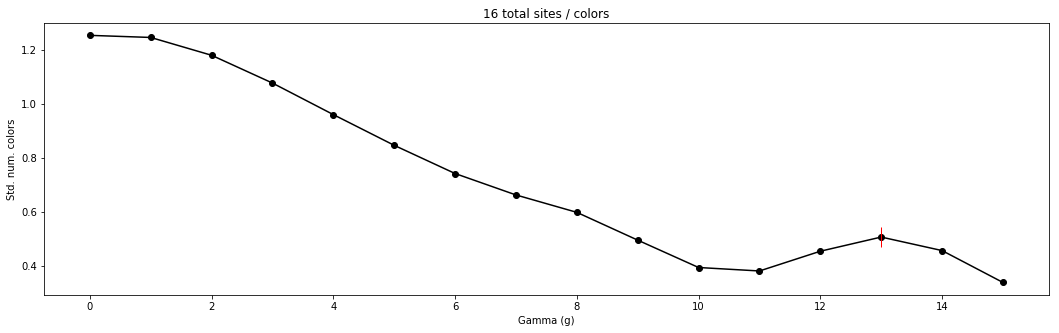

25 [12 20]
[0.6 1. ]



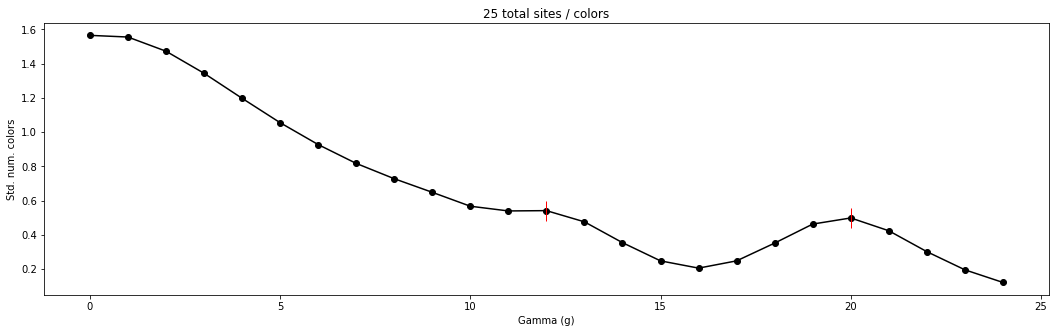

36 [17 28]
[0.60714286 1.        ]



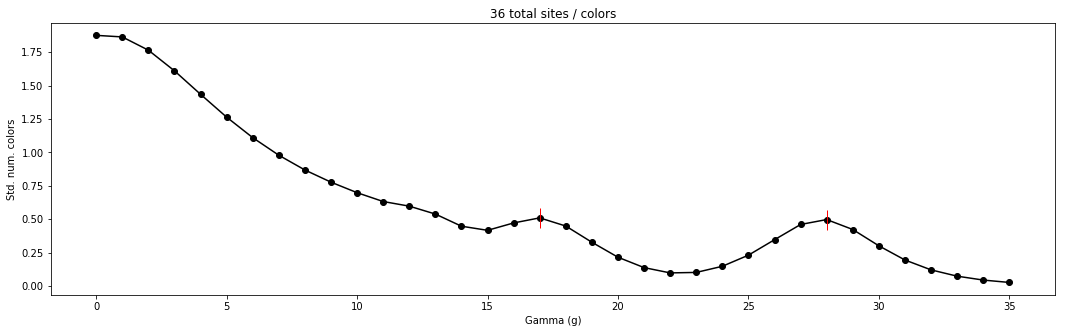

49 [16 23 37]
[0.43243243 0.62162162 1.        ]



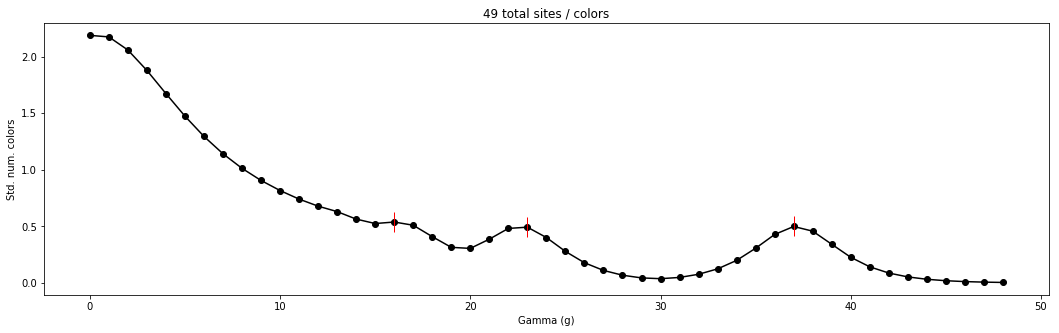

64 [21 29 48]
[0.4375     0.60416667 1.        ]



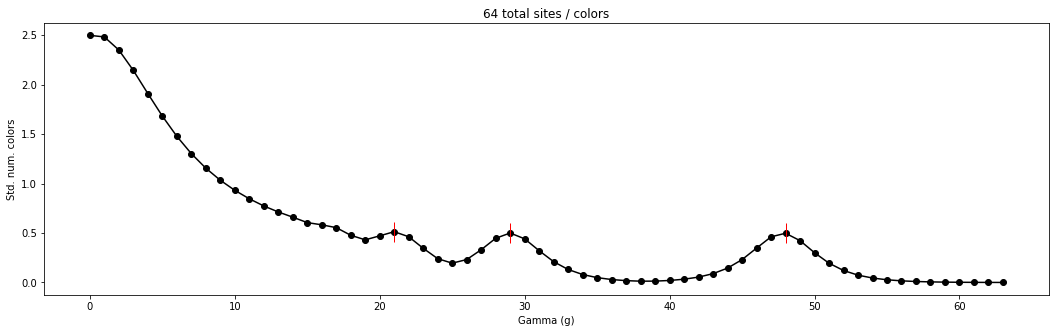

81 [20 26 36 60]
[0.33333333 0.43333333 0.6        1.        ]



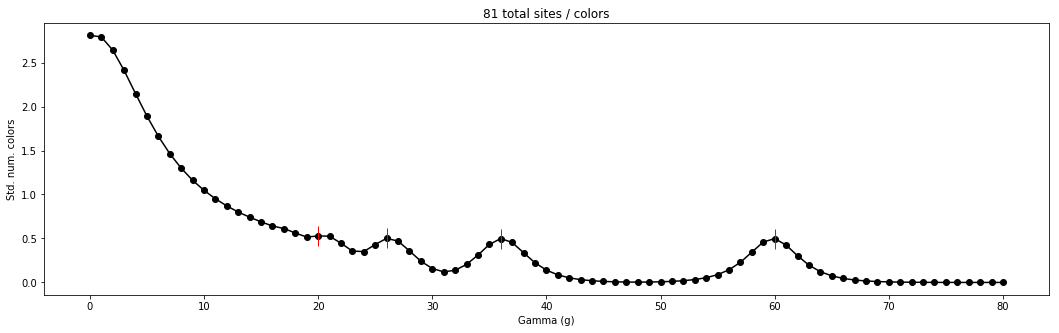

100 [25 32 44 73]
[0.34246575 0.43835616 0.60273973 1.        ]



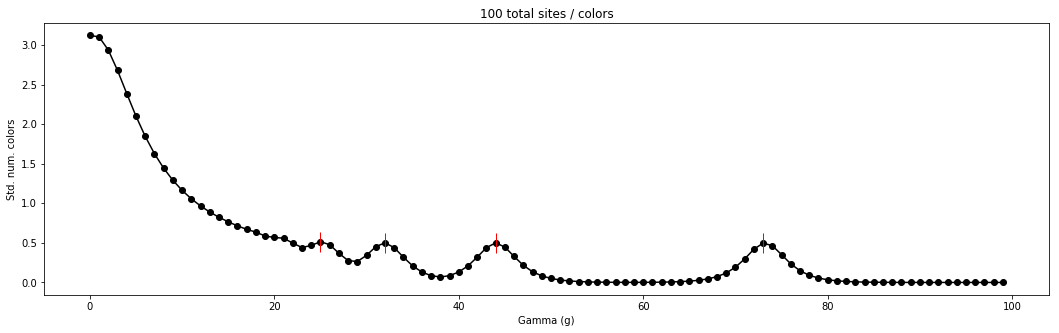

121 [25 30 38 53 88]
[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]



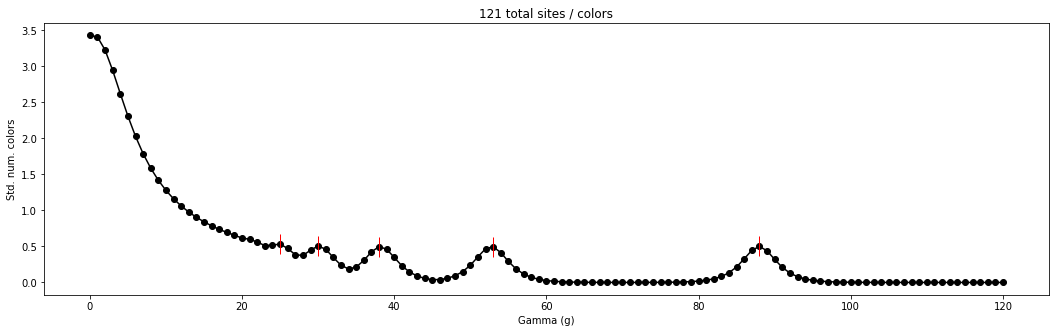

144 [ 25  29  35  45  62 104]
[0.24038462 0.27884615 0.33653846 0.43269231 0.59615385 1.        ]



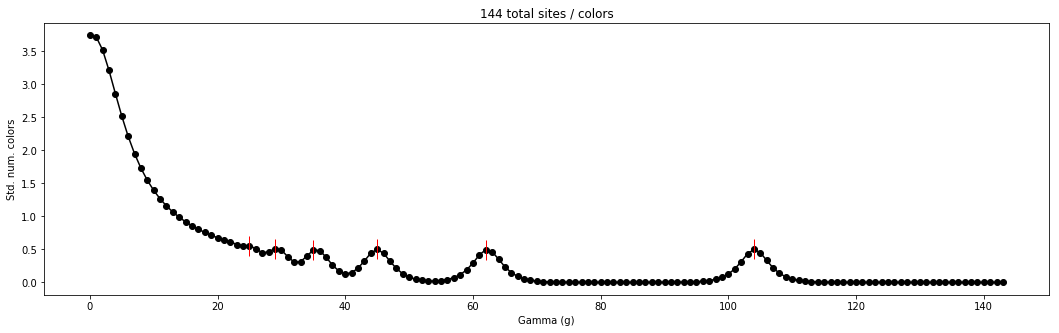

200 [ 30  34  40  48  61  85 143]
[0.20979021 0.23776224 0.27972028 0.33566434 0.42657343 0.59440559
 1.        ]



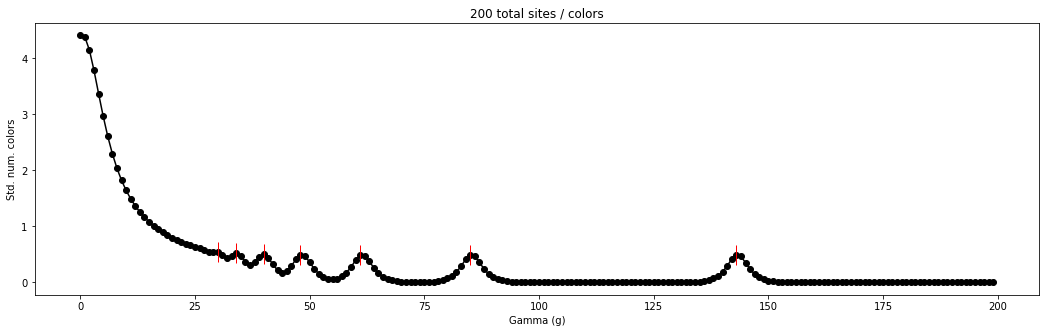

In [216]:
plot_std_colors(16)
plot_std_colors(25)
plot_std_colors(36)
plot_std_colors(49)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plot_std_colors(144)
plot_std_colors(200)
# plt.show()

300 [ 35  39  44  50  59  71  91 126 213]
[0.16431925 0.18309859 0.20657277 0.23474178 0.27699531 0.33333333
 0.42723005 0.5915493  1.        ]



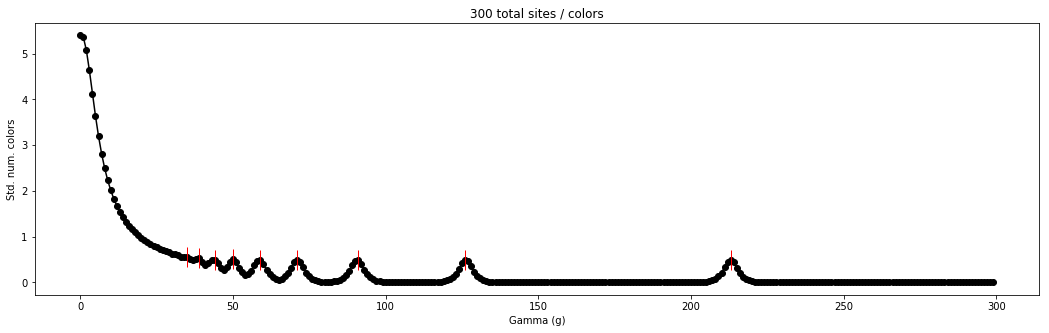

In [217]:
plot_std_colors(300)

500 [ 43  47  51  57  63  71  81  96 116 149 208 352]
[0.12215909 0.13352273 0.14488636 0.16193182 0.17897727 0.20170455
 0.23011364 0.27272727 0.32954545 0.42329545 0.59090909 1.        ]



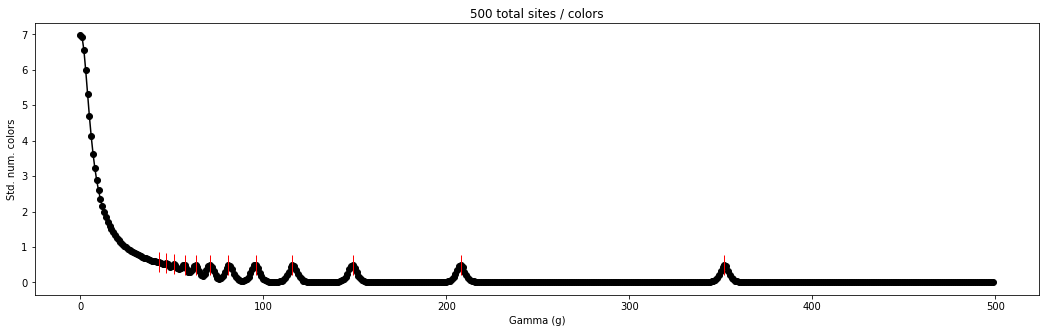

In [218]:
plot_std_colors(500)

600 [ 48  52  56  61  67  75  84  97 114 139 178 249 422]
[0.11374408 0.12322275 0.13270142 0.14454976 0.15876777 0.17772512
 0.19905213 0.22985782 0.27014218 0.32938389 0.42180095 0.59004739
 1.        ]



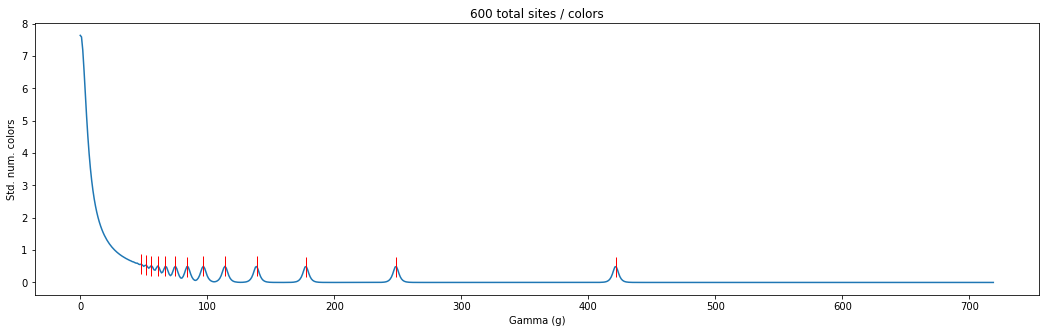

In [240]:
plot_std_colors(600)

700 [ 52  56  60  65  71  78  87  98 113 132 161 207 289 491]
[0.10590631 0.11405295 0.12219959 0.13238289 0.14460285 0.15885947
 0.17718941 0.19959267 0.23014257 0.2688391  0.32790224 0.42158859
 0.5885947  1.        ]



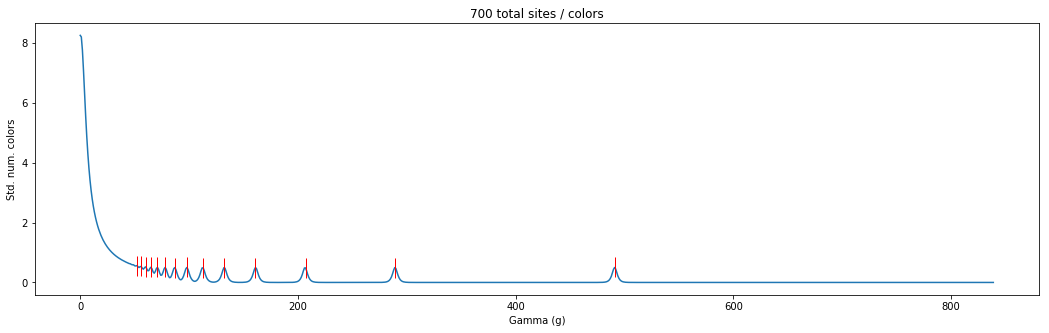

In [239]:
plot_std_colors(700)

800 [ 52  55  59  63  68  74  81  89  99 111 128 151 184 235 330 561]
[0.09269162 0.09803922 0.10516934 0.11229947 0.12121212 0.13190731
 0.14438503 0.15864528 0.17647059 0.19786096 0.22816399 0.26916221
 0.32798574 0.41889483 0.58823529 1.        ]



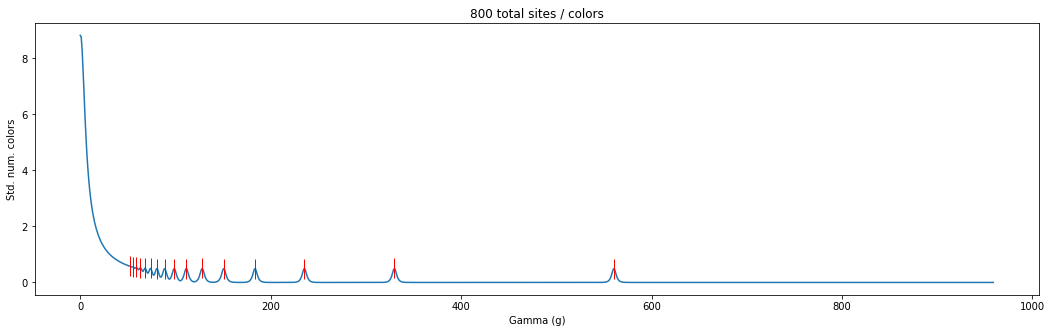

In [241]:
plot_std_colors(800)

900 [ 55  58  62  66  71  76  83  90  99 111 125 144 169 206 264 371 630]
[0.08730159 0.09206349 0.0984127  0.1047619  0.11269841 0.12063492
 0.13174603 0.14285714 0.15714286 0.17619048 0.1984127  0.22857143
 0.26825397 0.32698413 0.41904762 0.58888889 1.        ]



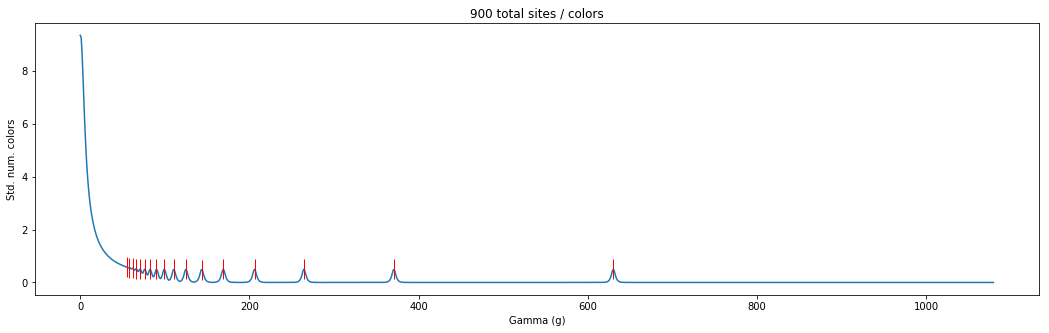

In [242]:
plot_std_colors(900)

1000 [ 58  61  65  69  73  78  84  91 100 110 122 138 159 187 228 293 411 699]
[0.08297568 0.08726753 0.09298999 0.09871245 0.10443491 0.11158798
 0.12017167 0.13018598 0.14306152 0.15736767 0.17453505 0.19742489
 0.22746781 0.26752504 0.32618026 0.41917024 0.58798283 1.        ]



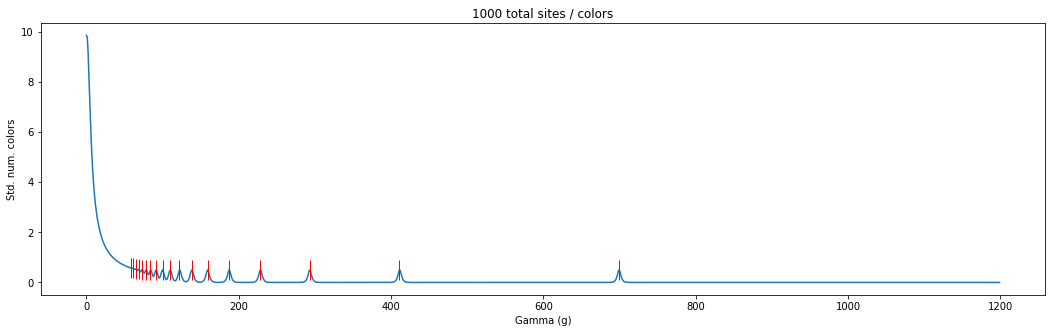

In [249]:
plot_std_colors(1000)

1200 [ 62  65  69  73  77  82  87  93 101 109 119 131 146 165 190 224 273 351
 493 838]
[0.07398568 0.07756563 0.0823389  0.08711217 0.09188544 0.09785203
 0.10381862 0.11097852 0.12052506 0.1300716  0.14200477 0.15632458
 0.17422434 0.19689737 0.22673031 0.2673031  0.32577566 0.41885442
 0.58830549 1.        ]



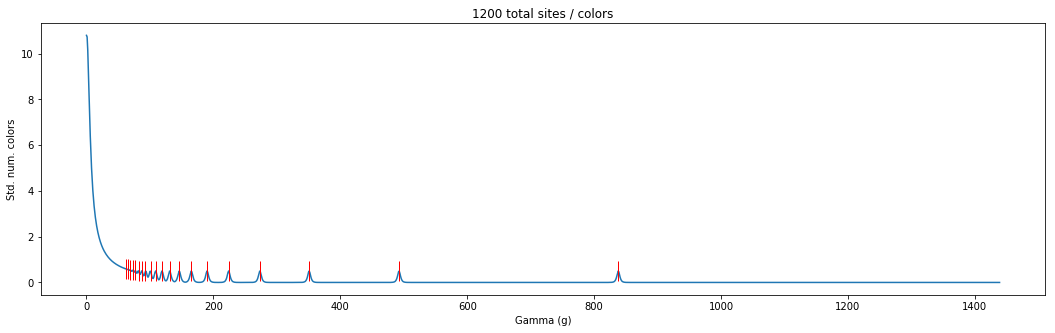

In [250]:
plot_std_colors(1200)

1400 [ 66  69  72  76  80  84  89  95 101 108 117 127 138 152 170 192 221 261
 318 409 574 977]
[0.06755374 0.07062436 0.07369498 0.07778915 0.08188332 0.08597748
 0.09109519 0.09723644 0.10337769 0.11054248 0.11975435 0.12998976
 0.14124872 0.1555783  0.17400205 0.19651996 0.22620266 0.26714432
 0.32548618 0.41862845 0.58751279 1.        ]



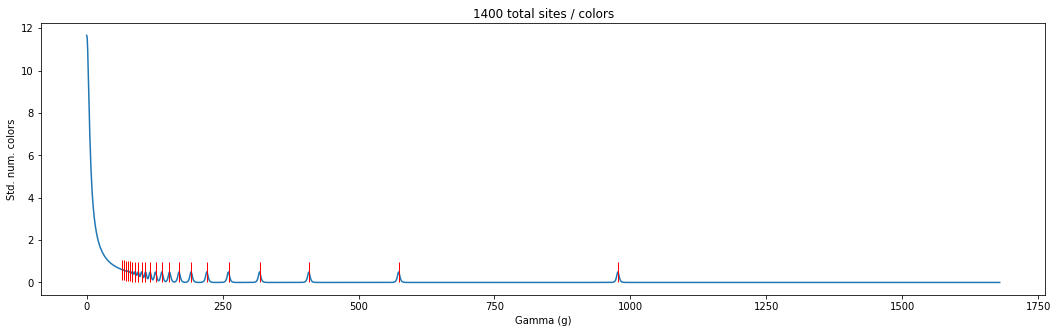

In [251]:
plot_std_colors(1400)

1600 [  72   75   79   82   86   91   96  102  108  115  123  133  144  157
  174  194  219  252  297  363  466  655 1116]
[0.06451613 0.0672043  0.07078853 0.0734767  0.07706093 0.08154122
 0.08602151 0.09139785 0.09677419 0.10304659 0.11021505 0.11917563
 0.12903226 0.140681   0.15591398 0.17383513 0.19623656 0.22580645
 0.26612903 0.32526882 0.41756272 0.58691756 1.        ]



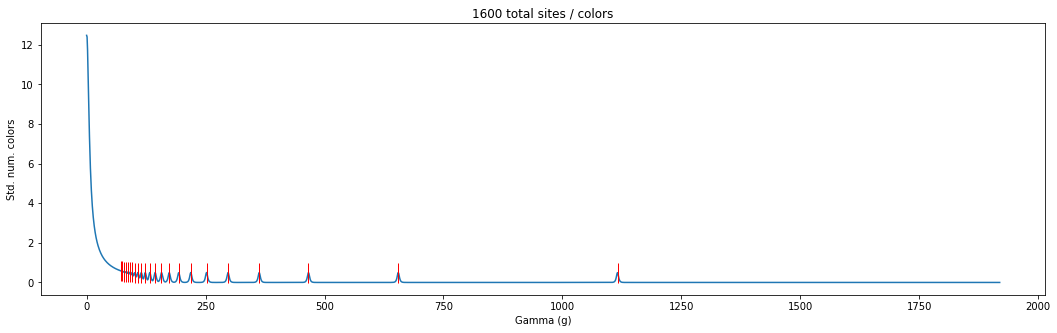

In [252]:
plot_std_colors(1600)

1800 [  77   81   84   88   92   97  102  107  114  121  129  138  149  162
  177  195  217  246  283  334  408  524  736 1254]
[0.06140351 0.0645933  0.06698565 0.07017544 0.07336523 0.07735247
 0.08133971 0.08532695 0.09090909 0.09649123 0.10287081 0.11004785
 0.11881978 0.1291866  0.14114833 0.15550239 0.17304625 0.19617225
 0.22567783 0.26634769 0.32535885 0.41786284 0.58692185 1.        ]



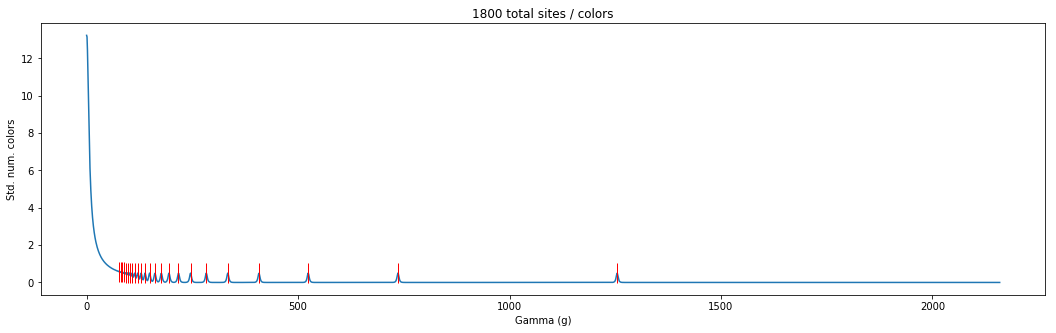

In [253]:
plot_std_colors(1800)

2000 [  77   83   86   89   93   97  102  107  113  119  126  134  143  153
  165  179  196  216  241  273  314  370  452  582  817 1393]
[0.05527638 0.05958363 0.06173726 0.06389088 0.06676238 0.06963388
 0.07322326 0.07681263 0.08111989 0.08542714 0.09045226 0.09619526
 0.10265614 0.10983489 0.11844939 0.12849964 0.14070352 0.15506102
 0.1730079  0.1959799  0.22541278 0.26561378 0.32447954 0.4178033
 0.58650395 1.        ]



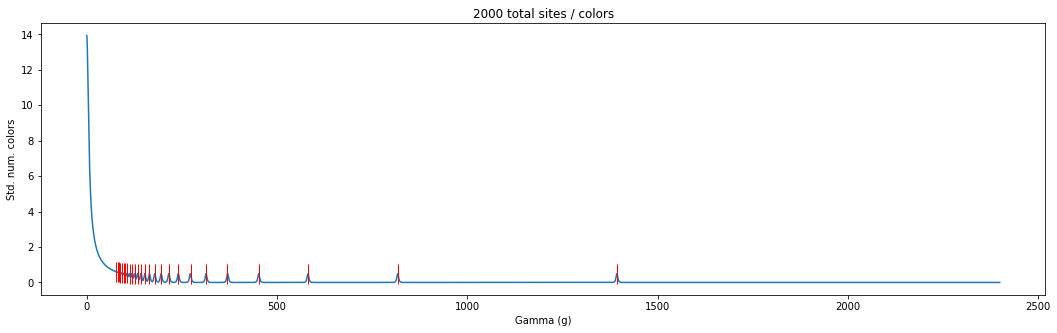

In [254]:
plot_std_colors(2000)

In [57]:
ds = {}

ds[64] = "[0.4375     0.60416667 1.        ]"
ds[81] = "[0.33333333 0.43333333 0.6        1.        ]"
ds[100] = "[0.34246575 0.43835616 0.60273973 1.        ]"
ds[121] = "[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]"
ds[144] = "[0.24038462 0.27884615 0.33653846 0.43269231 0.59615385 1.        ]"
ds[200] = "[0.20979021 0.23776224 0.27972028 0.33566434 0.42657343 0.59440559 1.        ]"
ds[300] = "[0.16431925 0.18309859 0.20657277 0.23474178 0.27699531 0.33333333 0.42723005 0.5915493  1.        ]"
ds[500] = "[0.12215909 0.13352273 0.14488636 0.16193182 0.17897727 0.20170455 0.23011364 0.27272727 0.32954545 0.42329545 0.59090909 1.        ]"
ds[600] = "[0.11374408 0.12322275 0.13270142 0.14454976 0.15876777 0.17772512 0.19905213 0.22985782 0.27014218 0.32938389 0.42180095 0.59004739 1.        ]"
ds[700] = "[0.10590631 0.11405295 0.12219959 0.13238289 0.14460285 0.15885947 0.17718941 0.19959267 0.23014257 0.2688391  0.32790224 0.42158859 0.5885947  1.        ]"
ds[800] = "[0.09269162 0.09803922 0.10516934 0.11229947 0.12121212 0.13190731 0.14438503 0.15864528 0.17647059 0.19786096 0.22816399 0.26916221 0.32798574 0.41889483 0.58823529 1.        ]"
ds[900] = "[0.08730159 0.09206349 0.0984127  0.1047619  0.11269841 0.12063492 0.13174603 0.14285714 0.15714286 0.17619048 0.1984127  0.22857143 0.26825397 0.32698413 0.41904762 0.58888889 1.        ]"
ds[1000] = "[0.08297568 0.08726753 0.09298999 0.09871245 0.10443491 0.11158798 0.12017167 0.13018598 0.14306152 0.15736767 0.17453505 0.19742489 0.22746781 0.26752504 0.32618026 0.41917024 0.58798283 1.        ]"
ds[1200] = "[0.07398568 0.07756563 0.0823389  0.08711217 0.09188544 0.09785203 0.10381862 0.11097852 0.12052506 0.1300716  0.14200477 0.15632458 0.17422434 0.19689737 0.22673031 0.2673031  0.32577566 0.41885442 0.58830549 1.        ]"
ds[1400] = "[0.06755374 0.07062436 0.07369498 0.07778915 0.08188332 0.08597748 0.09109519 0.09723644 0.10337769 0.11054248 0.11975435 0.12998976 0.14124872 0.1555783  0.17400205 0.19651996 0.22620266 0.26714432 0.32548618 0.41862845 0.58751279 1.        ]"
ds[1600] = "[0.06451613 0.0672043  0.07078853 0.0734767  0.07706093 0.08154122 0.08602151 0.09139785 0.09677419 0.10304659 0.11021505 0.11917563 0.12903226 0.140681   0.15591398 0.17383513 0.19623656 0.22580645 0.26612903 0.32526882 0.41756272 0.58691756 1.        ]"
ds[1800] = "[0.06140351 0.0645933  0.06698565 0.07017544 0.07336523 0.07735247 0.08133971 0.08532695 0.09090909 0.09649123 0.10287081 0.11004785 0.11881978 0.1291866  0.14114833 0.15550239 0.17304625 0.19617225 0.22567783 0.26634769 0.32535885 0.41786284 0.58692185 1.        ]"
ds[2000] = "[0.05527638 0.05958363 0.06173726 0.06389088 0.06676238 0.06963388 0.07322326 0.07681263 0.08111989 0.08542714 0.09045226 0.09619526 0.10265614 0.10983489 0.11844939 0.12849964 0.14070352 0.15506102 0.1730079  0.1959799  0.22541278 0.26561378 0.32447954 0.4178033 0.58650395 1.        ]"

for key in ds:
    ds[key] = ds[key][1:-1].strip().split(" ")
    tmp = []
    for x in ds[key]:
        if len(x)>0: tmp.append(float(x))
    ds[key] = np.array(tmp)
    
ds

{64: array([0.4375    , 0.60416667, 1.        ]),
 81: array([0.33333333, 0.43333333, 0.6       , 1.        ]),
 100: array([0.34246575, 0.43835616, 0.60273973, 1.        ]),
 121: array([0.28409091, 0.34090909, 0.43181818, 0.60227273, 1.        ]),
 144: array([0.24038462, 0.27884615, 0.33653846, 0.43269231, 0.59615385,
        1.        ]),
 200: array([0.20979021, 0.23776224, 0.27972028, 0.33566434, 0.42657343,
        0.59440559, 1.        ]),
 300: array([0.16431925, 0.18309859, 0.20657277, 0.23474178, 0.27699531,
        0.33333333, 0.42723005, 0.5915493 , 1.        ]),
 500: array([0.12215909, 0.13352273, 0.14488636, 0.16193182, 0.17897727,
        0.20170455, 0.23011364, 0.27272727, 0.32954545, 0.42329545,
        0.59090909, 1.        ]),
 600: array([0.11374408, 0.12322275, 0.13270142, 0.14454976, 0.15876777,
        0.17772512, 0.19905213, 0.22985782, 0.27014218, 0.32938389,
        0.42180095, 0.59004739, 1.        ]),
 700: array([0.10590631, 0.11405295, 0.12219959, 0.1323

In [61]:
data1 = [(n,ds[n][-2]) for n in ds]
data2 = [(n,ds[n][-3]) for n in ds]
data1

[(64, 0.60416667),
 (81, 0.6),
 (100, 0.60273973),
 (121, 0.60227273),
 (144, 0.59615385),
 (200, 0.59440559),
 (300, 0.5915493),
 (500, 0.59090909),
 (600, 0.59004739),
 (700, 0.5885947),
 (800, 0.58823529),
 (900, 0.58888889),
 (1000, 0.58798283),
 (1200, 0.58830549),
 (1400, 0.58751279),
 (1600, 0.58691756),
 (1800, 0.58692185),
 (2000, 0.58650395)]

In [67]:
data = data2 # (x,y) values where x is N and y is the obtained value

# x = [a,b]
def objective(x):
    cost = 0
    for i in range(len(data)):
        n = data[i][0]
        cn = data[i][1]
        cost += (1/(n**x[0]) + x[1] - cn)**2
    return cost

# initial guesses
x0 = np.array([1, 0.58])
print('Initial Objective: ' + str(objective(x0)))

# optimize
solution = minimize(objective,x0)
x = solution.x
print(solution)

# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('a = ' + str(x[0]))
print('b = ' + str(x[1]))
print()
sol2 = x
sol2

Initial Objective: 0.45816374887450717
      fun: 8.97916135585562e-05
 hess_inv: array([[37.75608944,  1.24832813],
       [ 1.24832813,  0.0697073 ]])
      jac: array([-1.68169208e-07,  4.62245225e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([0.90179559, 0.41790445])
Final Objective: 8.97916135585562e-05
Solution
a = 0.9017955860617082
b = 0.41790445105805735



array([0.90179559, 0.41790445])

In [74]:
print("Sol. 1:", sol1)
print("Sol. 2:", sol2)

Sol. 1: [0.94123887 0.58688567]
Sol. 2: [0.90179559 0.41790445]


In [71]:
extr_val_1 = []
extr_val_2 = []

for i in range(3,101):
    a1, b1 = sol1[0], sol1[1]
    a2, b2 = sol2[0], sol2[1]
    n = i*1000
    cn1 = 1/(n**a1) + b1
    cn2 = 1/(n**a2) + b2
    extr_val_1.append((n,cn1))
    extr_val_2.append((n,cn2))

In [72]:
extr_val_1

[(3000, 0.5874192473999866),
 (4000, 0.5872926751954408),
 (5000, 0.5872155714374339),
 (6000, 0.587163548835633),
 (7000, 0.5871260189790014),
 (8000, 0.5870976318693313),
 (9000, 0.5870753889596787),
 (10000, 0.5870574773517061),
 (11000, 0.5870427356003187),
 (12000, 0.5870303847360553),
 (13000, 0.5870198825268863),
 (14000, 0.5870108397316541),
 (15000, 0.5870029695955827),
 (16000, 0.5869960561371182),
 (17000, 0.5869899335388324),
 (18000, 0.5869844723527377),
 (19000, 0.5869795700263251),
 (20000, 0.5869751442473817),
 (21000, 0.5869711281744762),
 (22000, 0.5869674669573091),
 (23000, 0.5869641151571255),
 (24000, 0.5869610348065349),
 (25000, 0.5869581939309845),
 (26000, 0.5869555654084916),
 (27000, 0.5869531260805739),
 (28000, 0.5869508560520359),
 (29000, 0.5869487381343603),
 (30000, 0.586946757399444),
 (31000, 0.586944900818946),
 (32000, 0.586943156970659),
 (33000, 0.5869415157977953),
 (34000, 0.5869399684103718),
 (35000, 0.5869385069203403),
 (36000, 0.5869371243

In [73]:
extr_val_2

[(3000, 0.4186361752273707),
 (4000, 0.4184689695843221),
 (5000, 0.4183660716537777),
 (6000, 0.4182960845986604),
 (7000, 0.41824525731504525),
 (8000, 0.41820659276452105),
 (9000, 0.4181761460033767),
 (10000, 0.4181515197157551),
 (11000, 0.418131171100906),
 (12000, 0.4181140612316139),
 (13000, 0.4180994642736921),
 (14000, 0.4180868574437984),
 (15000, 0.41807585441983264),
 (16000, 0.4180661633961605),
 (17000, 0.41805755974628167),
 (18000, 0.4180498676752223),
 (19000, 0.4180429475869191),
 (20000, 0.41803668718916265),
 (21000, 0.41803099510462577),
 (22000, 0.41802579619988833),
 (23000, 0.41802102811574576),
 (24000, 0.4180166386525896),
 (25000, 0.418012583774304),
 (26000, 0.4180088260661633),
 (27000, 0.41800533353045316),
 (28000, 0.41800207863641575),
 (29000, 0.41799903756388335),
 (30000, 0.4179961895959634),
 (31000, 0.41799351662753564),
 (32000, 0.41799100276454254),
 (33000, 0.4179886339950544),
 (34000, 0.41798639791751757),
 (35000, 0.4179842835148923),
 (360

## OLD VERSION

[17 28]
[0.60714286 1.        ]

[21 29 48]
[0.4375     0.60416667 1.        ]

[20 26 36 60]
[0.33333333 0.43333333 0.6        1.        ]

[25 32 44 73]
[0.34246575 0.43835616 0.60273973 1.        ]

[25 30 38 53 88]
[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]



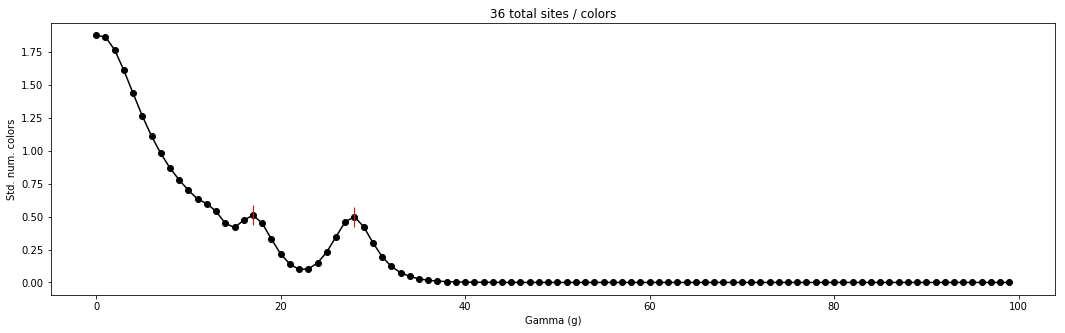

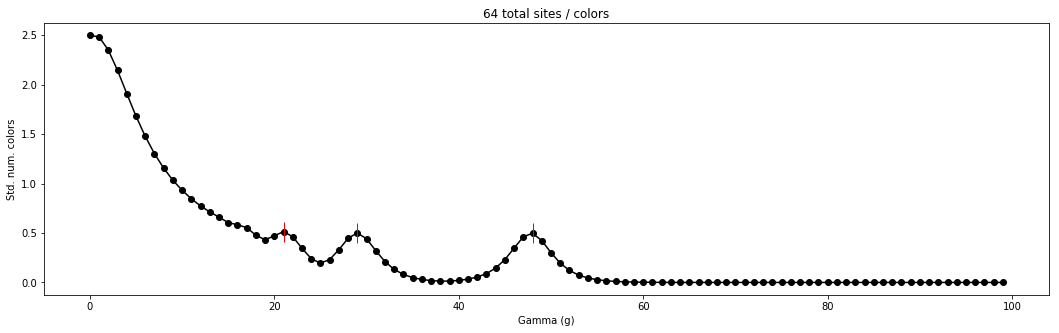

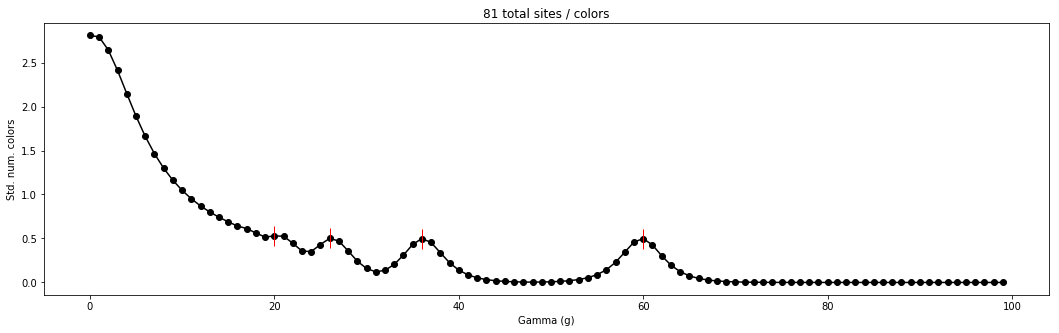

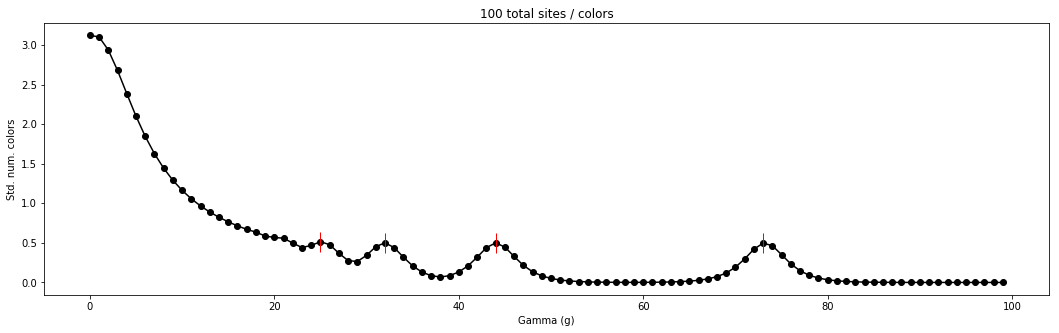

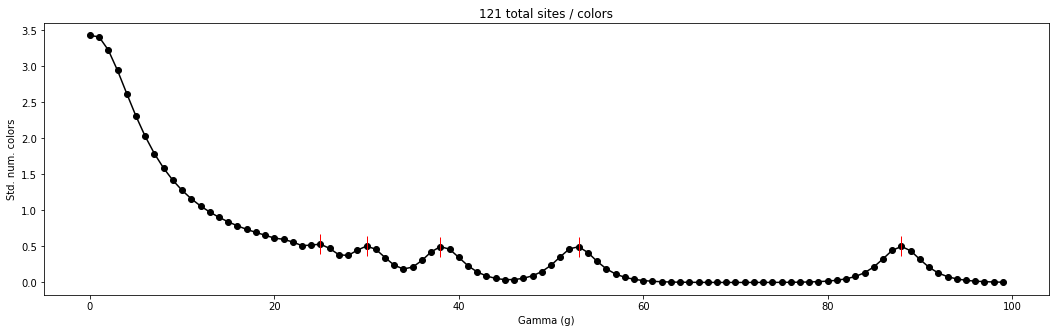

In [68]:
plot_std_colors(36)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plt.show()

C:\Users\Oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


[0.01365924 0.60819554 1.        ]

[0.00794813 0.43965698 0.60594018 1.        ]

[0.00635133 0.34280461 0.43840883 0.60354337 1.        ]

[0.00518984 0.27779295 0.34334881 0.43635619 0.60133843 1.        ]

[0.00431965 0.28157326 0.3421621  0.43412527 0.59952256 1.        ]



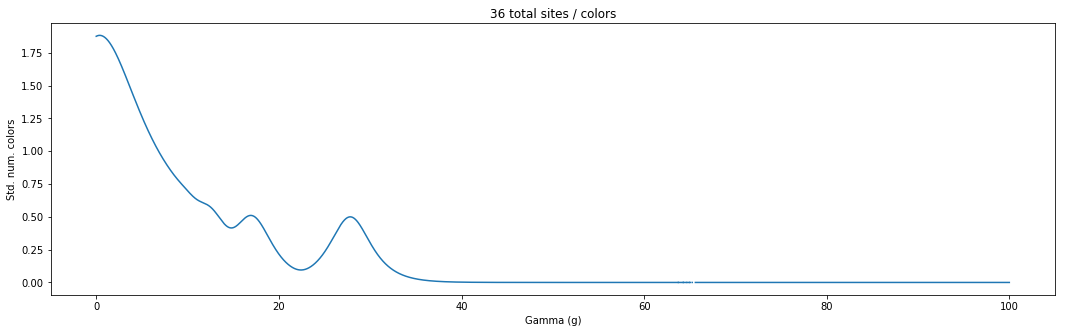

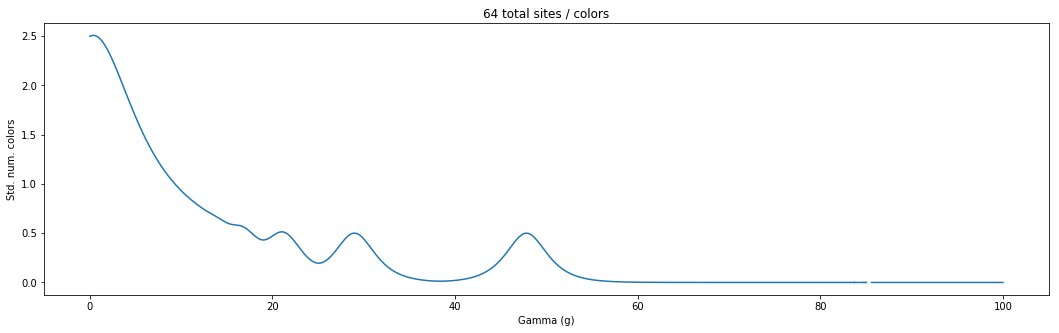

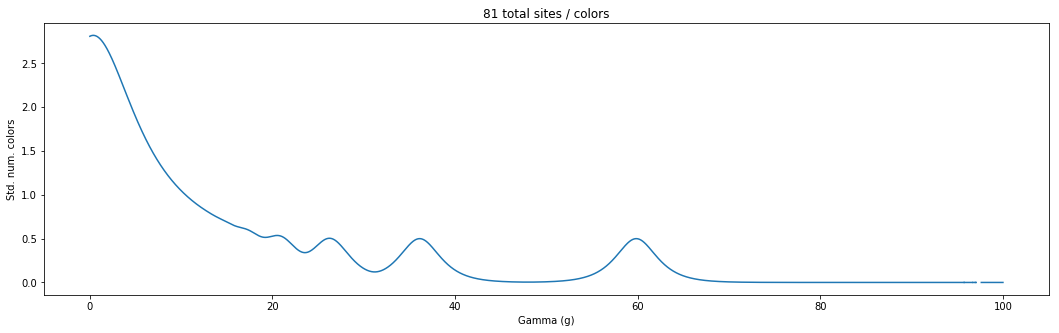

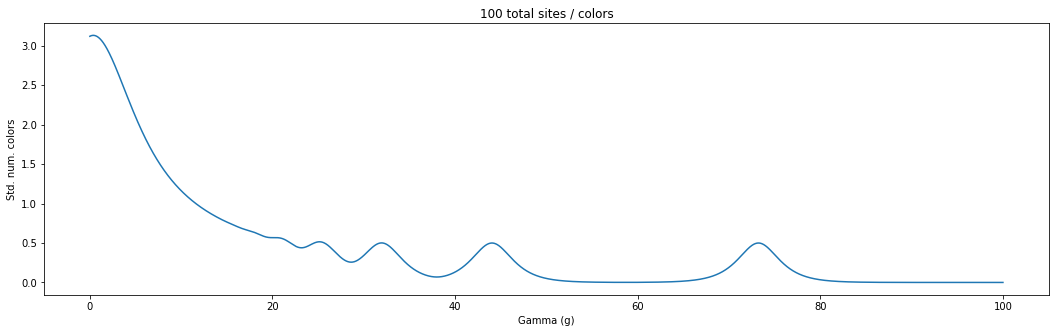

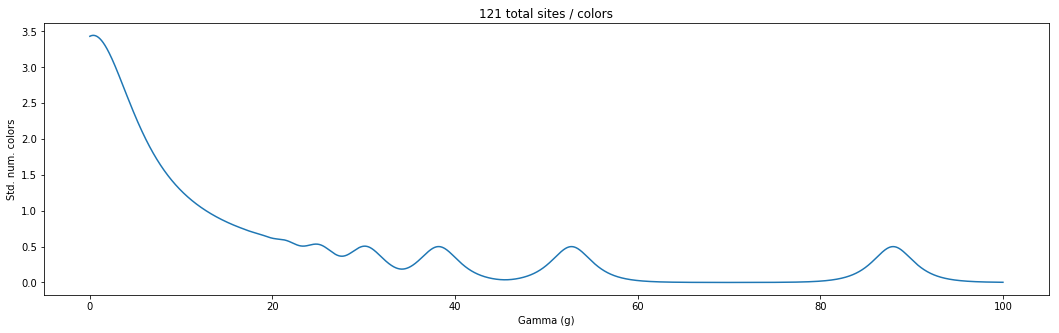

In [50]:
plot_std_colors(36)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plt.show()